# Image Processing

In [2]:
import pandas as pd
import cv2
from skimage.filters import prewitt_h, prewitt_v, sobel, roberts
from skimage.feature import canny
from skimage.io import imshow as ski_imshow
from matplotlib import pyplot as plt
import numpy
import os
from IPython.display import display

## Read Data

In [4]:
print("Curr directory: " + os.getcwd())

## read in data
data = pd.read_csv("..\data\HAM10000_metadata.csv")
print(data.head(10))

## drop uneeded id
data.drop('lesion_id', axis=1, inplace=True)

row = data.iloc[1]

Curr directory: c:\Users\jobo9\Desktop\class\ml class\sem proj\code
     lesion_id      image_id   dx dx_type   age     sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0    male          ear
5  HAM_0001466  ISIC_0027850  bkl   histo  75.0    male          ear
6  HAM_0002761  ISIC_0029176  bkl   histo  60.0    male         face
7  HAM_0002761  ISIC_0029068  bkl   histo  60.0    male         face
8  HAM_0005132  ISIC_0025837  bkl   histo  70.0  female         back
9  HAM_0005132  ISIC_0025209  bkl   histo  70.0  female         back


## Grey Scale

In [3]:
print("img name: " + row['image_id'] )

img = cv2.imread("..\data\\allData\HAM10000_images\\" + row['image_id'] +".jpg", flags= cv2.IMREAD_GRAYSCALE)  ## readsgrey 

print(img.shape)  # 450x600
## What size to resize too?  leal said samller is better
dim = (300, 225)
img = cv2.resize(img, dim) # 225x300

# leal said not to do this most likely
# features = numpy.reshape(img, 300*225)  # results in grey scale values array with length of 120,000 indexed 0-119,999

cv2.imshow(row['image_id'], img)
cv2.waitKey(0)
cv2.destroyAllWindows()

img name: ISIC_0025030
(450, 600)


## Mean RGB

In [ ]:
print(row['image_id'] )

img = cv2.imread("..\data\\allData\HAM10000_images\\" + row['image_id'] +".jpg", flags= cv2.IMREAD_COLOR)  ## reads three arrays
print(img.shape)  # 450x600x3


# resize image
dim = (300, 225)
img = cv2.resize(img, dim) # 225x300x3

feature_matrix = numpy.zeros((225,300)) 
for i in range(0,img.shape[0]):
    for j in range(0, img.shape[1]):
        ave = ((int(img[i,j,0]) + int(img[i,j,1]) + int(img[i,j,2]) )/3 ) # average color channels
        feature_matrix[i][j] = ave
        
## leal said dont do this reshape it to on long array
# features = numpy.reshape(feature_matrix, 225*300)
# print(features[119999])   # 0-119,999

cv2.imshow(row['image_id'], img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Edge Detection

In [6]:
print(row['image_id'] )
img = cv2.imread("..\data\\allData\HAM10000_images\\" + row['image_id'] +".jpg", flags= cv2.IMREAD_GRAYSCALE)  ## reads grey 
# print(img.shape)  # 450x600

dim = (300, 225)
# resize image
img = cv2.resize(img, dim)


ISIC_0025030


### Sobel

c:\Users\jobo9\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


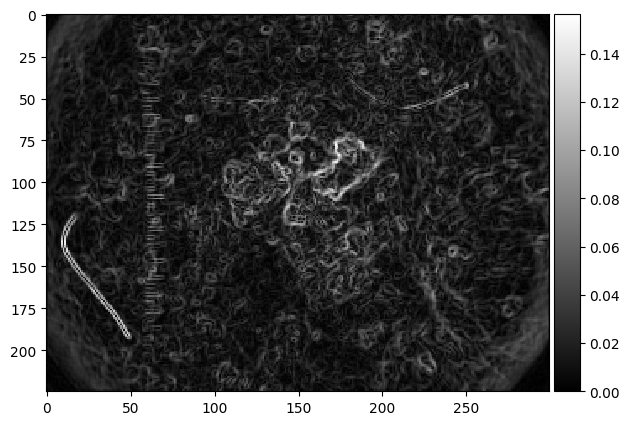

In [6]:
## calculating edges using sobel kernel
edges_sobel = sobel(img)

ski_imshow(edges_sobel, cmap=plt.cm.gray)
plt.show()

### Roberts

c:\Users\jobo9\AppData\Local\Programs\Python\Python39\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


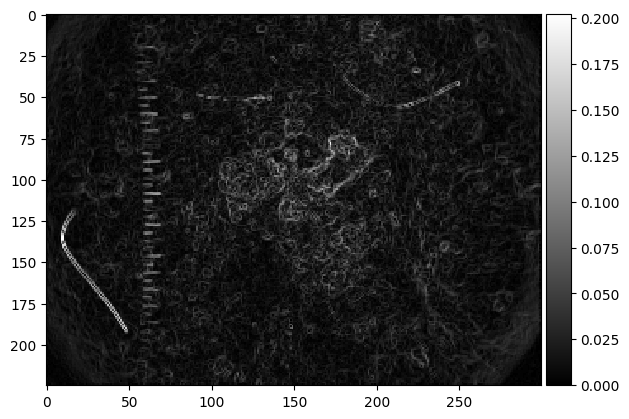

In [8]:
## calculating edges using roberts kernel
edges_roberts = roberts(img)

ski_imshow(edges_roberts, cmap=plt.cm.gray)
plt.show()

### Canny

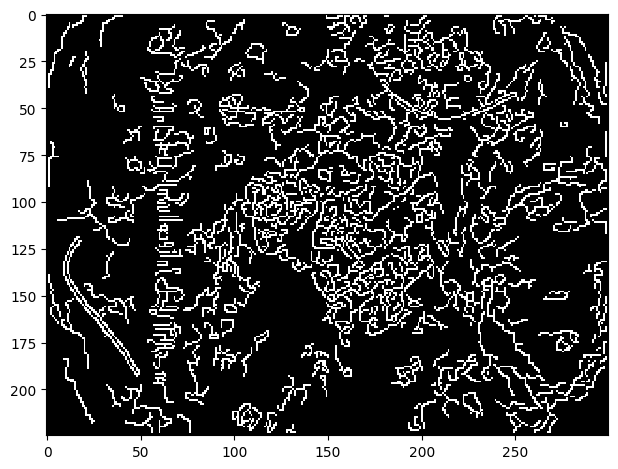

In [9]:
## canny edge detection 
edges_canny = canny(img, sigma=.5)

ski_imshow(edges_canny, cmap=plt.cm.gray)
plt.show()